<a href="https://colab.research.google.com/github/Leerith/Metodos.compartido/blob/main/7_Entrega_Python_Corregida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrega de Métodos Numéricos I (Sara del Pozo, 1498507)
====


Este programa genera números aleatorios que están distribuidos como una distribución de Cauchy usando el método Monte Carlo. Se piden resultados intermedios y se representan los números generados en dos gráficas.


**1. Importa las librerías numpy, scipy.stats y matplotlib.pyplot.**


















In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

#Esta es mi entrega de mn1 corregida por el flix, para que os fiéis de que es un código yo creo que bastante bueno :)
#Fijaos en que realmente casi nunca calculamos nada, literalmente le decimos a python "ordenador, calcula esto!"

**2. Obten 50 números espaciados uniformemente entre -4 y 4. Escribe la media, mediana, desviación estándar y varianza de estos números.**






In [ ]:
x=np.linspace(-4,4,50)
print('μ=',np.mean(x))
print('m=',np.median(x))
print('σ=',np.std(x))
print('v=',np.var(x))

μ= -2.842170943040401e-16
m= 0.0
σ= 2.356060357495806
v= 5.551020408163265


**3. Accede a la distribución de Cauchy a partir de scipy y escribe la media, la desviación estándar, la distribución cumulativa en 0 y 
el máximo de esta distribución. Razona por qué se obtienen esos valores para la media y la desviación estándar.**


In [ ]:
print('μ=',ss.cauchy.mean(0))
print('σ=',ss.cauchy.std(0))
print('F(x)=',ss.cauchy.cdf(0)) 
Y=ss.cauchy.pdf(0)
print('Máx(f)=',Y) #Dada la expresión analítica de la función, el máximo debe estar en x=0
print('Vemos que tanto la media como la desviación estándar de la distribución producen un error al intentar calularse.')
print('Esto se debe a que las integrales impropias evaluadas entre menos infinito y más infinito de xf(x) y x^2f(x) son divergentes.')
print('Por tanto, la media y la desviación estándar de esta distribución quedan no definidas.')

μ= nan
σ= nan
F(x)= 0.5
Máx(f)= 0.3183098861837907
Vemos que tanto la media como la desviación estándar de la distribución producen un error al intentar calularse.
Esto se debe a que las integrales impropias evaluadas entre menos infinito y más infinito de xf(x) y x^2f(x) son divergentes.
Por tanto, la media y la desviación estándar de esta distribución quedan no definidas.


**4. Para los 50 números espaciados uniformemente entre -4 y 4, dibuja la correspodiente distribución de Cauchy e indica en una gráfica donde se aceptarán y se rechazarán valores de la ordenada en el método Monte Carlo para x = 1.**



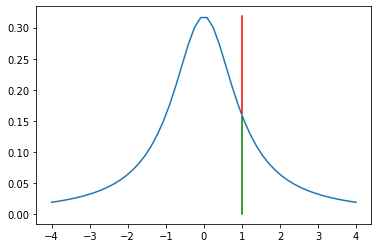

In [ ]:
f=ss.cauchy.pdf(x)
y=np.linspace(0,Y,50)

acep = y <= ss.cauchy.pdf(1) #valores aceptados
rech = y > ss.cauchy.pdf(1) #valores rechazados

plt.plot(x,f)
plt.plot(np.linspace(1,1,len(y[acep])), y[acep], 'g')
plt.plot(np.linspace(1,1,len(y[rech])), y[rech], 'r')

plt.show() #Cabe decir que no estamos utilizando el método de Monte Carlo, estamos representando que puntos se aceptarían y cuáles no.

**5. Genera números aleatorios distribuidos uniformemente entre -4 y 4. A partir de qué potencia de 10 el error en la desviación estándar es menor que 2 por mil.**







In [ ]:
E=1
n=0

while E >= 0.002:
  n=n+1
  a=10**n
  A=np.random.uniform(-4,4,a)
  E=np.std(A)/np.sqrt(a)
  print('n=10^',n,';   E=',E)
print('Cuando la potencia de 10 ha alcanzado',n, 'el error se ha reducido hasta ',E) #Por lo que he visto, el valor siempre es n=7


n=10^ 1 ;   E= 0.7296508706816115
n=10^ 2 ;   E= 0.21243703085853047
n=10^ 3 ;   E= 0.07439118766937262
n=10^ 4 ;   E= 0.023238216748251928
n=10^ 5 ;   E= 0.007315590040776966
n=10^ 6 ;   E= 0.002309471086323715
n=10^ 7 ;   E= 0.0007302717301150421
Cuando la potencia de 10 ha alcanzado 7 el error se ha reducido hasta  0.0007302717301150421


**6. Genera números aleatorios entre 0 y el máximo de la distribución de Cauchy y acepta únicamente aquellos que satisfacen la condición Monte Carlo. Escribe la media y la desviación estándar de la distribución de los números aceptados.**


μ(y)= 0.09346729959991845
σ(y)= 0.078791213891823
μ(x)= -0.003500757535123927
σ(x)= 1.4222188161356242


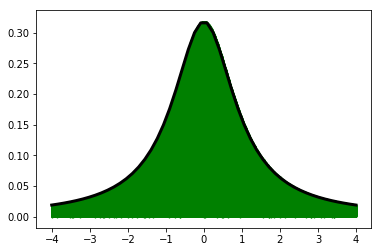

In [ ]:
t=np.random.uniform(-4,4,1000000)
g=ss.cauchy.pdf(t)
u=np.random.uniform(0,Y,1000000)

ACEP = u <= g #Aceptamos los puntos (u,t) que cumplen u<=g(t)

print('μ(y)=',np.mean(u[ACEP])) #Media de las ordenadas de los puntos aceptados
print('σ(y)=',np.std(u[ACEP])) #Desviación de las ordenadas de los puntos aceptados

print('μ(x)=',np.mean(t[ACEP])) #Media de las abscisas de los puntos aceptados
print('σ(x)=',np.std(t[ACEP])) #Desviación de las abscisas de los puntos aceptados

# J. Flix (perfectíssim! i molt ràpid)

# J. Flix: afegeixo gràfica en aquesta part
plt.scatter(t[ACEP],u[ACEP],s=1,color='green')
plt.plot(x,f,'k',lw=3)
plt.show()


**7. Dibuja en una gráfica la distribución de Cauchy de los números espaciados uniformemente entre -4 y 4 del principio junto al histograma de los números generados según la distribución de Cauchy de 6 teniendo en cuenta que el área del histograma de los números de 6 debe de coincidir con el área de la distribución de Cauchy en tal intervalo.**


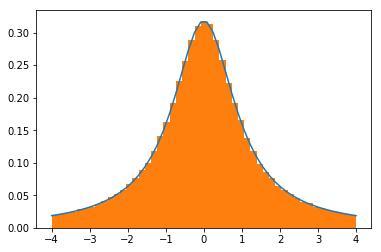

In [ ]:
h=np.histogram(t[ACEP],bins=x)[0]
w=(Y/h[24])*np.ones(len(t[ACEP]))
plt.plot(x,f)
plt.hist(t[ACEP],x, weights=w)

plt.show() # J. Flix: Perfect! 

